In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
pd.__version__

'1.4.2'

In [36]:
#CARIACO = xr.open_dataset("../annotatedDATA/CARIACO_merged_03.nc")
CARIACO = pd.read_csv("../DATA/January/Combined_CARIACO_data_v6.csv")
CARIACO['date'] = pd.to_datetime(CARIACO['time_month'])
CARIACO = CARIACO.set_index('date')

In [37]:
CARIACO.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 316 entries, 1995-11-01 to 2021-11-01
Data columns (total 97 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    316 non-null    int64  
 1   cdww                          299 non-null    float64
 2   iews                          299 non-null    float64
 3   inss                          299 non-null    float64
 4   mcc                           299 non-null    float64
 5   mwp                           299 non-null    float64
 6   si10                          299 non-null    float64
 7   sp                            300 non-null    float64
 8   sst                           299 non-null    float64
 9   t2m                           299 non-null    float64
 10  tauoc                         299 non-null    float64
 11  u10                           299 non-null    float64
 12  ust                           300 non-null   

Text(0.5, 0, 'SST [°C]')

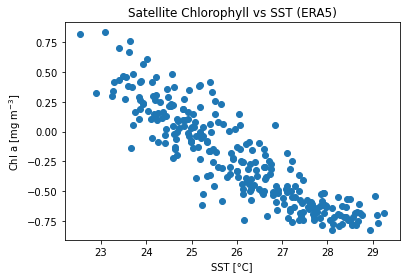

In [25]:
plt.scatter(CARIACO.sst - 273.15, np.log10(CARIACO.Satellite_chla))
plt.title("Satellite Chlorophyll vs SST (ERA5)")
plt.ylabel("Chl a $\mathrm{[mg \ m^{-3}]}$")
plt.xlabel("SST [°C]")

In [43]:
plt.rcParams['figure.figsize'] = [10, 5]

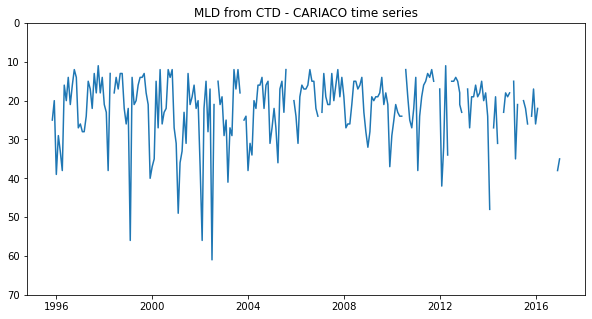

In [46]:
plt.plot(CARIACO.index, CARIACO.MLD)
plt.title("MLD from CTD - CARIACO time series")
plt.ylim(0,70)
plt.gca().invert_yaxis()
#plt.ylabel("Chl a $\mathrm{[mg \ m^{-3}]}$")
#plt.xlabel("wind [°C]")

In [5]:
Sat_chl_zeromean = CARIACO.Satellite_chla - CARIACO.Satellite_chla.mean()

Sat_chl_untivar = Sat_chl_zeromean / Sat_chl_zeromean.std()

In [9]:
Sat_chl_untivar.mean()

<xarray.DataArray 'Satellite_chla' ()>
array(-1.29189588e-17)

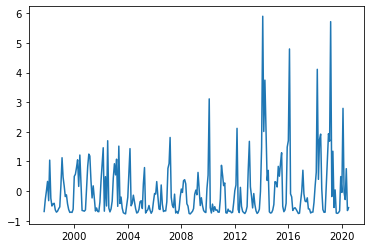

In [6]:
plt.plot(Sat_chl_untivar.time.values, Sat_chl_untivar.values)

AttributeError: 'DataArray' object has no attribute 'index'

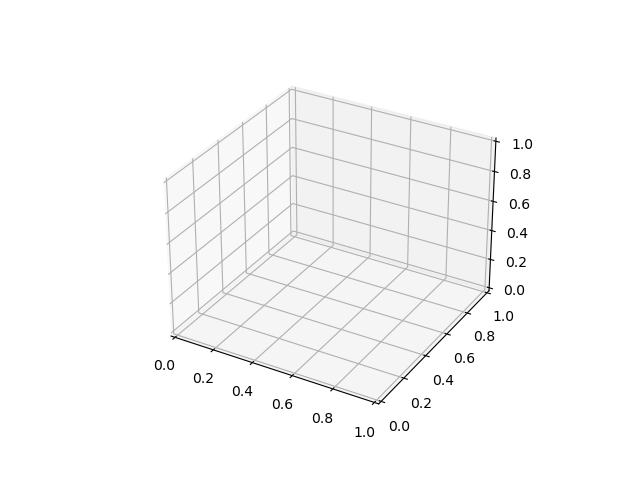

In [12]:
#%matplotlib notebook
%matplotlib widget

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d    


from mpl_toolkits import mplot3d

import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection="3d")



ax.plot(Sat_chl_untivar.index, Sat_chl_untivar)
#plt.show()

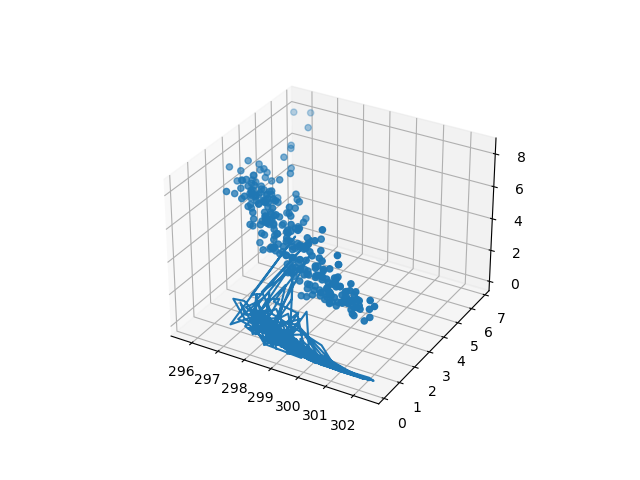

In [7]:
plt.plot(CARIACO.sst, CARIACO.Satellite_chla)
plt.show()

In [6]:
%matplotlib ipympl